In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
df=pd.read_excel("glass.xlsx")
df

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [ ]:
df1=pd.read_excel("glass.xlsx",sheet_name='glass')
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df1.shape

(214, 10)

In [ ]:
df1.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df1.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
for col in df1.columns[:-1]:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

RI: 17 outliers
Na: 7 outliers
Mg: 0 outliers
Al: 18 outliers
Si: 12 outliers
K: 7 outliers
Ca: 26 outliers
Ba: 38 outliers
Fe: 12 outliers


In [ ]:
print("Target Classes:", df1['Type'].unique())
print("Class Distribution:",df1['Type'].value_counts())

Target Classes: [1 2 3 5 6 7]
Class Distribution: Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


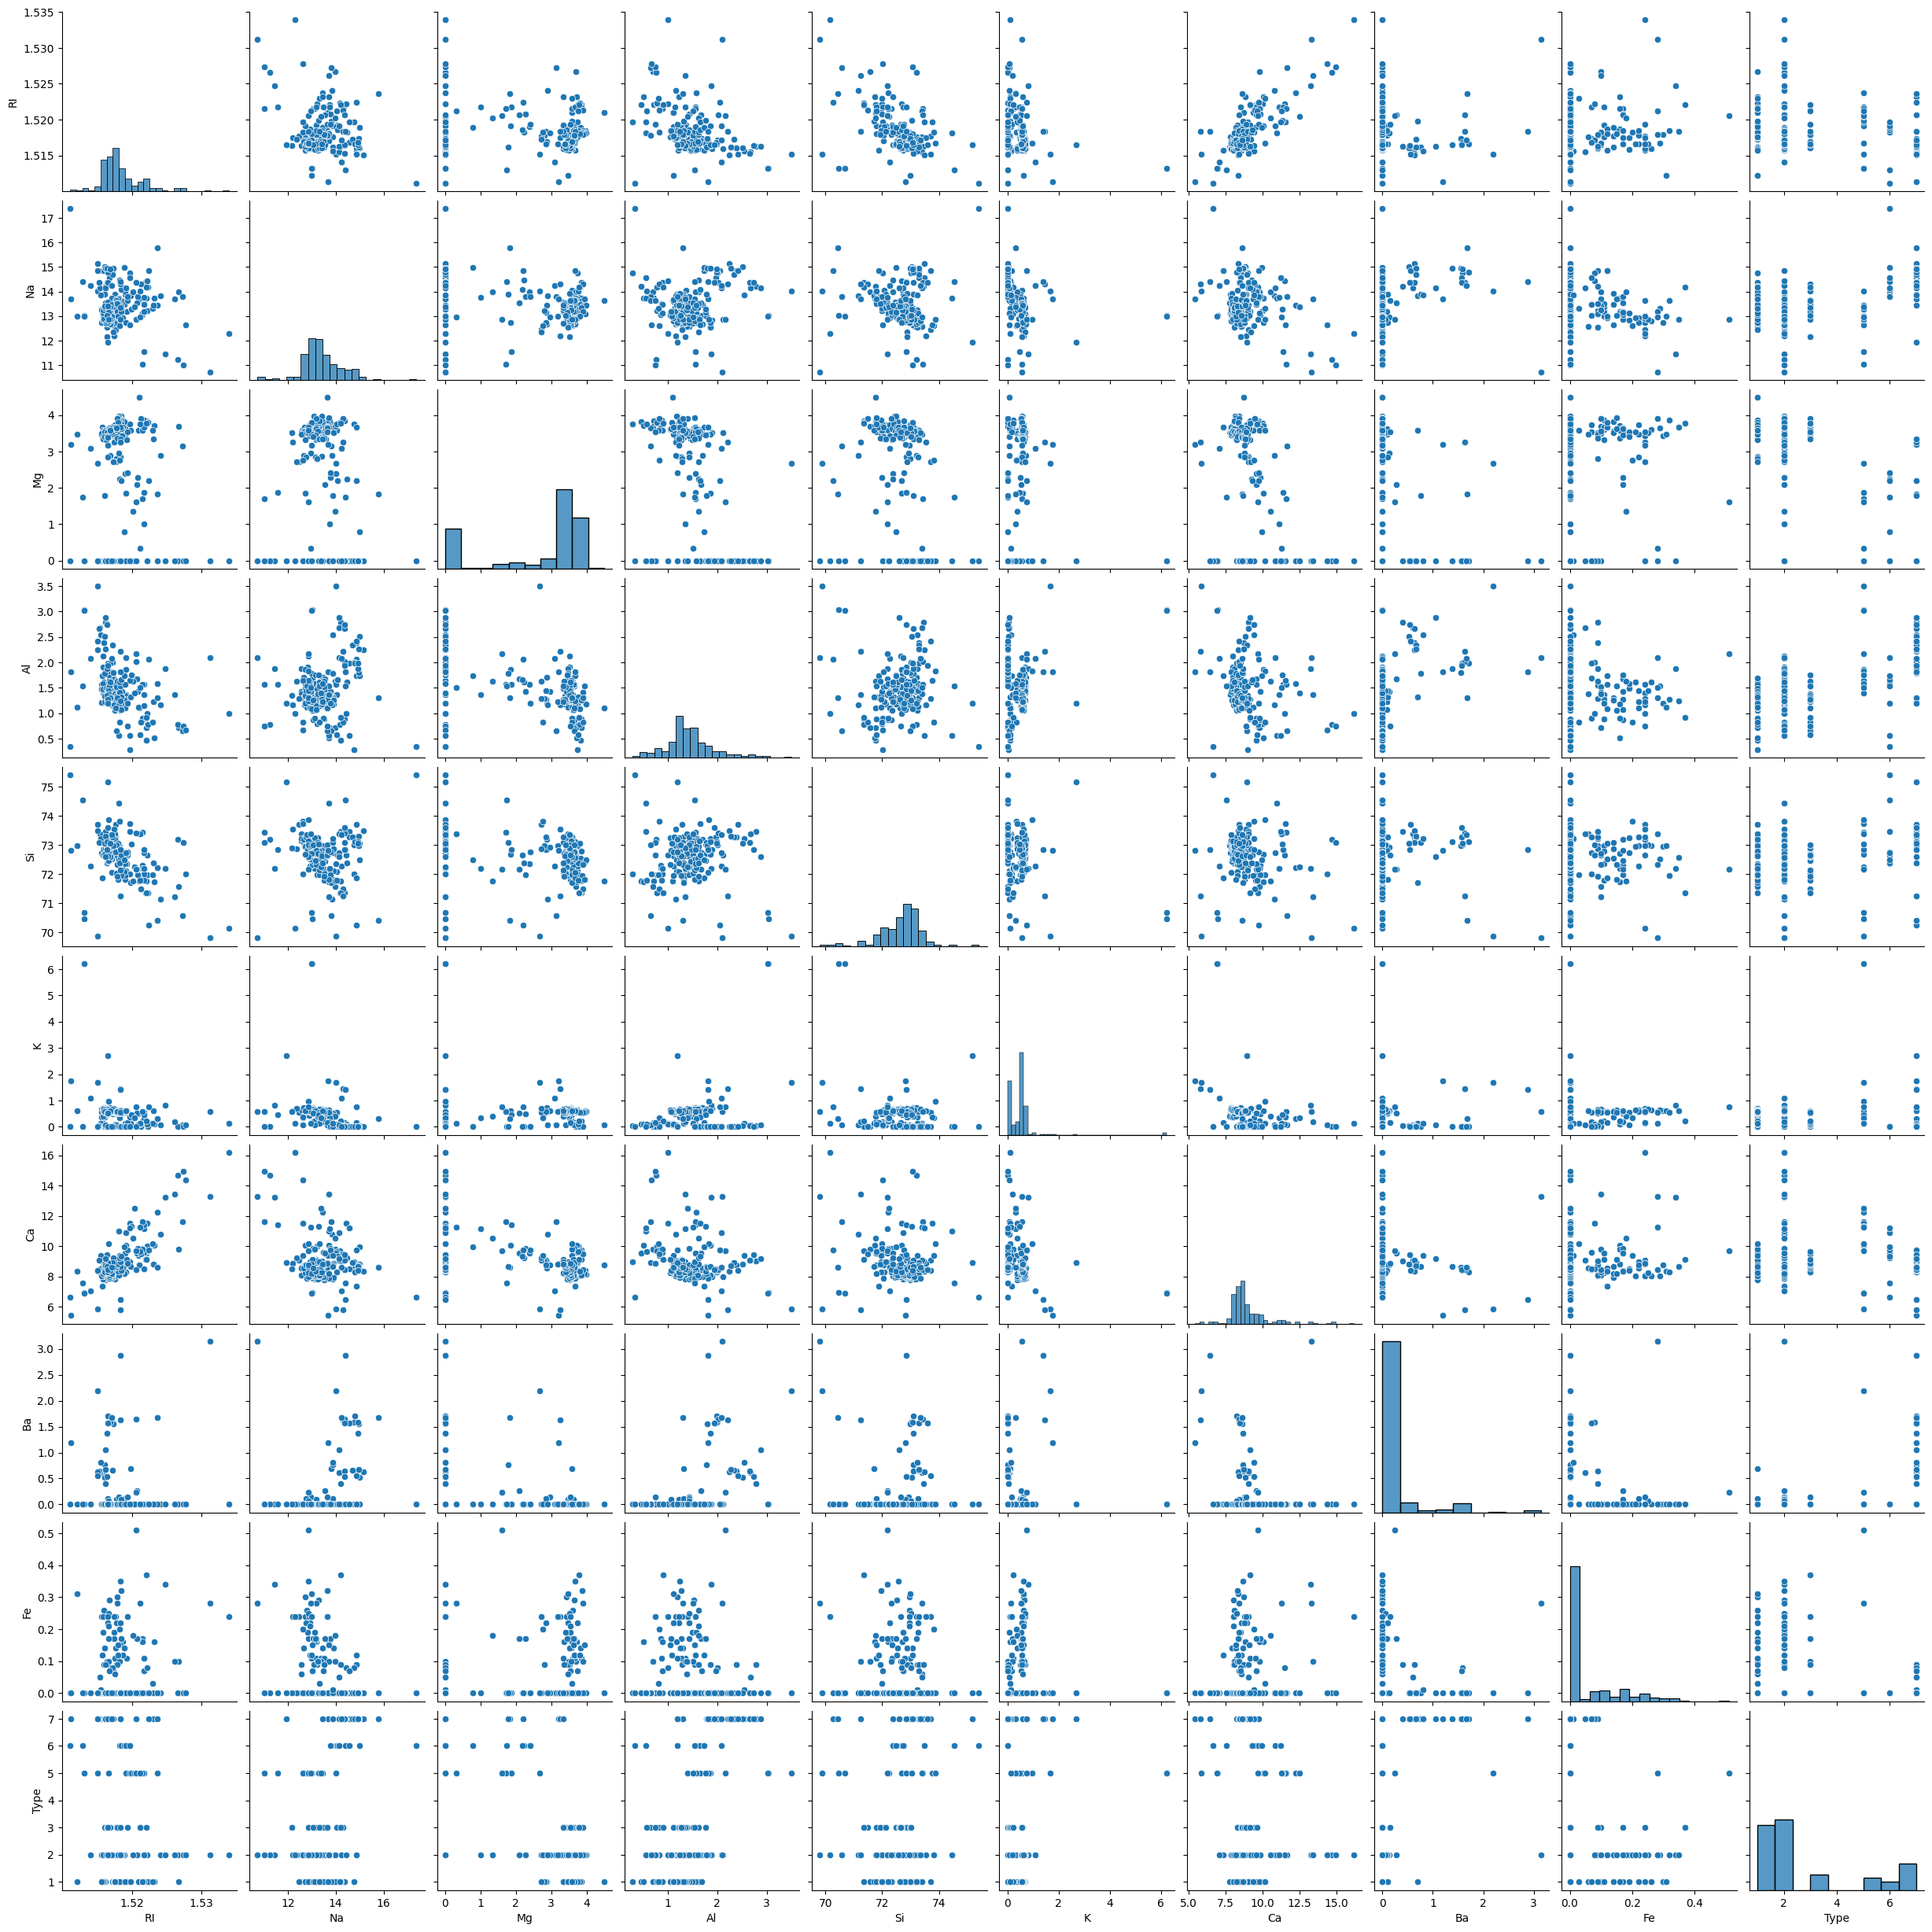

In [ ]:
sns.pairplot(df1)

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

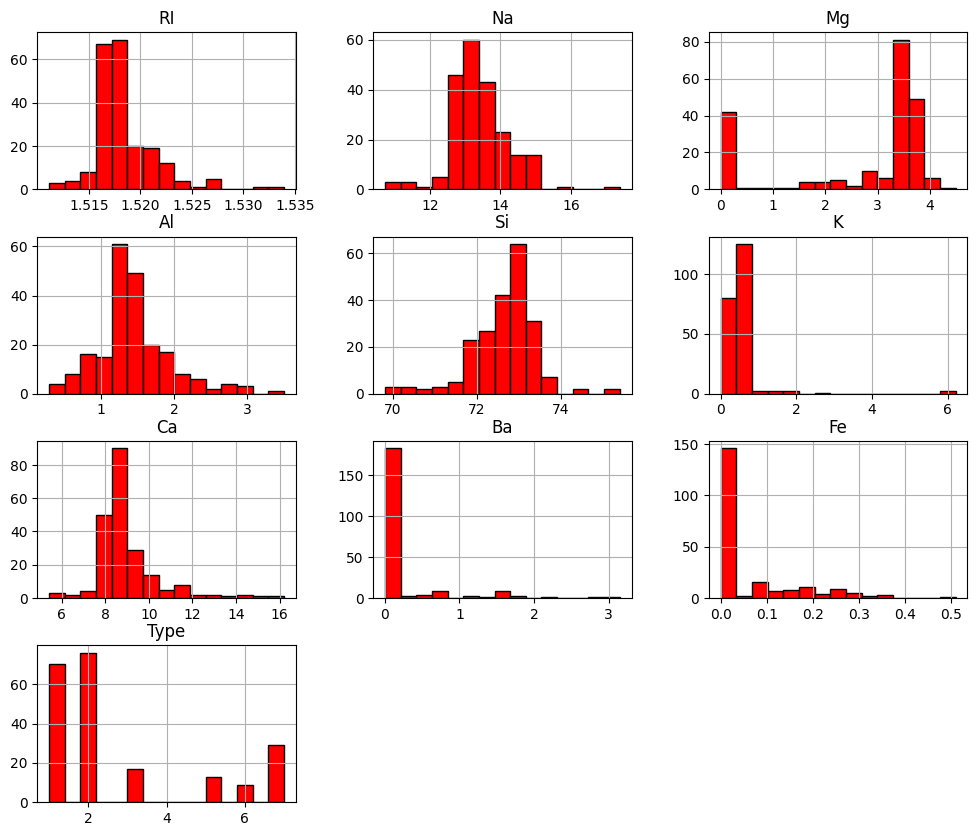

In [ ]:
df1.hist(bins=15,figsize=(12,10),color='red',edgecolor='black')

<Axes: >

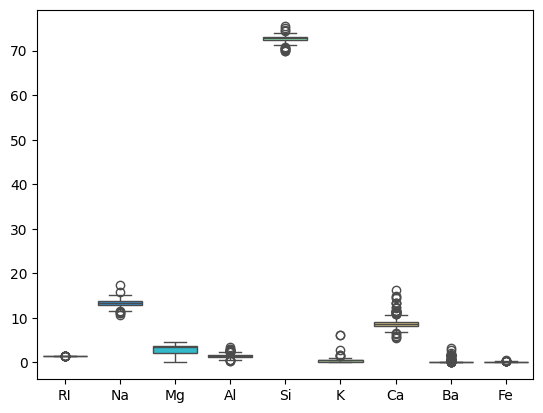

In [ ]:
sns.boxplot(data=df1.drop('Type',axis=1),palette="rainbow")

<Axes: >

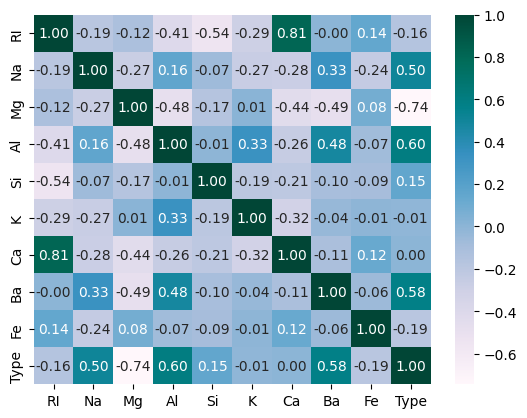

In [ ]:
sns.heatmap(df1.corr(),annot=True,cmap='PuBuGn',fmt='.2f')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=df1.drop('Type',axis=1)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
y=df1['Type']
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

<Axes: xlabel='Type', ylabel='count'>

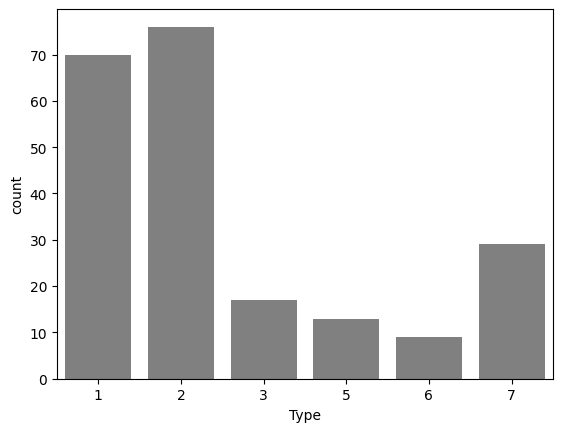

In [ ]:
sns.countplot(x=y,color='Grey')

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled,y_resampled = smote.fit_resample(x_scaled,y)

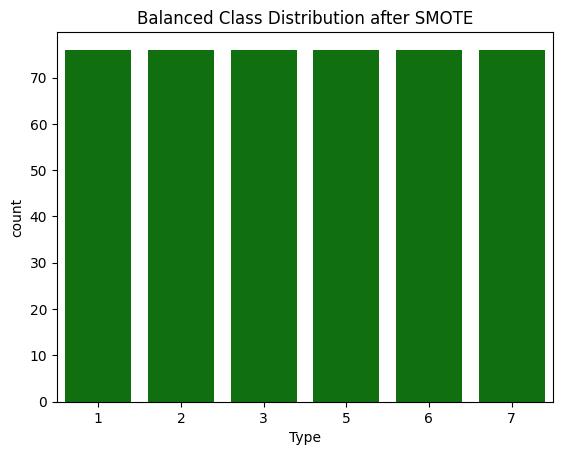

In [ ]:
sns.countplot(x=y_resampled,color="Green")
plt.title("Balanced Class Distribution after SMOTE")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((364, 9), (92, 9), (364,), (92,))

In [ ]:
rand_model=RandomForestClassifier(n_estimators=100,random_state=42)
rand_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rand_model.predict(x_test)
y_pred

array([6, 1, 5, 1, 3, 7, 5, 2, 6, 1, 2, 5, 2, 6, 6, 2, 5, 5, 7, 2, 2, 2,
       3, 2, 3, 7, 2, 7, 1, 3, 6, 3, 7, 2, 7, 2, 5, 5, 1, 1, 6, 2, 2, 2,
       3, 2, 2, 3, 7, 5, 3, 1, 3, 5, 6, 7, 1, 6, 1, 7, 5, 1, 3, 7, 5, 2,
       7, 6, 5, 7, 5, 6, 1, 6, 7, 7, 1, 6, 7, 2, 6, 5, 6, 1, 1, 7, 7, 2,
       2, 1, 3, 3])

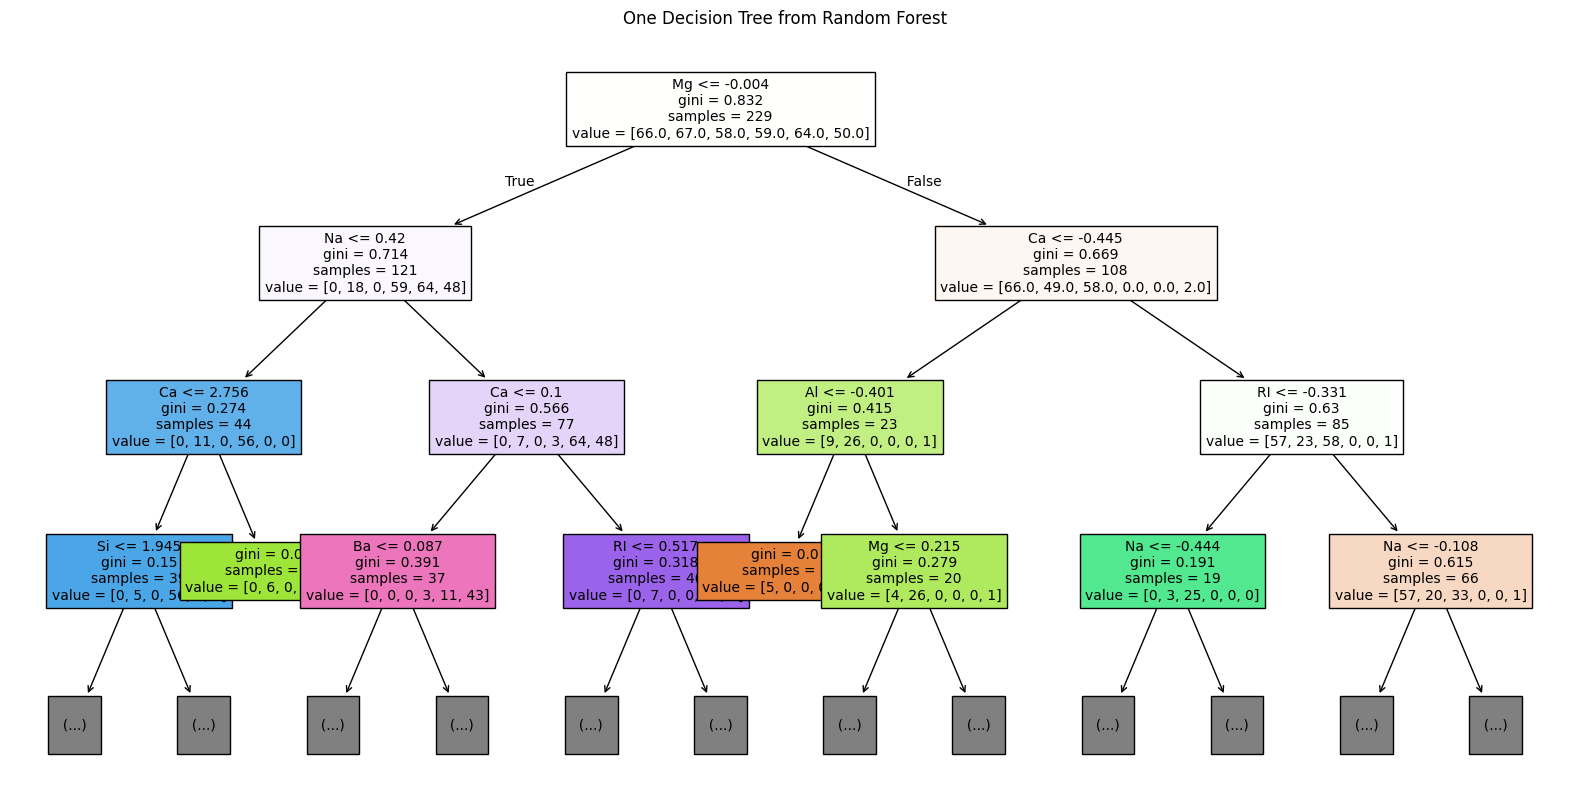

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rand_model.estimators_[0], filled=True, feature_names=x.columns, max_depth=3, fontsize=10)
plt.title("One Decision Tree from Random Forest")
plt.show()

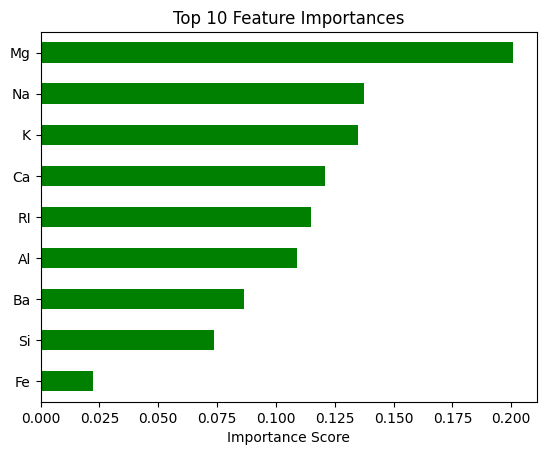

In [ ]:
feat_importance = pd.Series(rand_model.feature_importances_, index=x.columns)
feat_importance.nlargest(10).plot(kind='barh', color='Green')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9239
Precision: 0.9263
Recall: 0.9239
F1-Score: 0.9234


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92



Text(0.5, 25.722222222222214, 'Predicted')

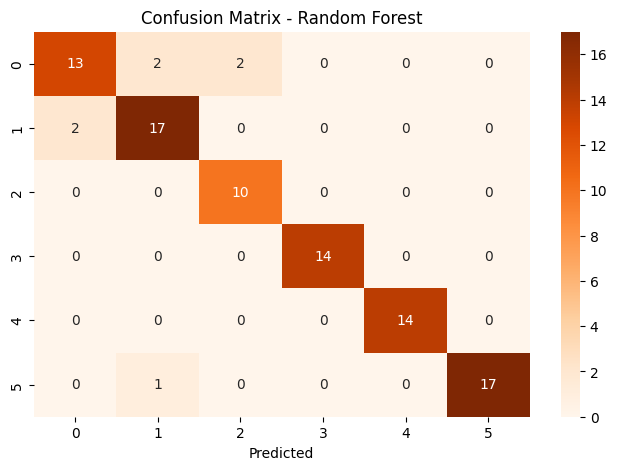

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")

In [ ]:
def evaluate_model(model, x_test,y_test, name="Model"):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f" {name}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}\n")
    return acc, prec, rec, f1

In [ ]:
def plot_feature_importance(model, feature_names, title="Feature Importances"):
    importances = model.feature_importances_
    feat_df = pd.Series(importances, index=feature_names).sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    feat_df.plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel('Importance Score')
    plt.show()

In [ ]:
def plot_conf_matrix(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

In [ ]:
bag_model = BaggingClassifier(n_estimators=100, random_state=42)
bag_model.fit(x_train,y_train)
bag_model

BaggingClassifier(n_estimators=100, random_state=42)

In [ ]:
evaluate_model(bag_model,x_test,y_test, "Bagging Classifier")

 Bagging Classifier
  Accuracy:  0.9348
  Precision: 0.9370
  Recall:    0.9348
  F1-Score:  0.9348



(0.9347826086956522,
 0.9370471014492755,
 0.9347826086956522,
 0.9347920195746282)

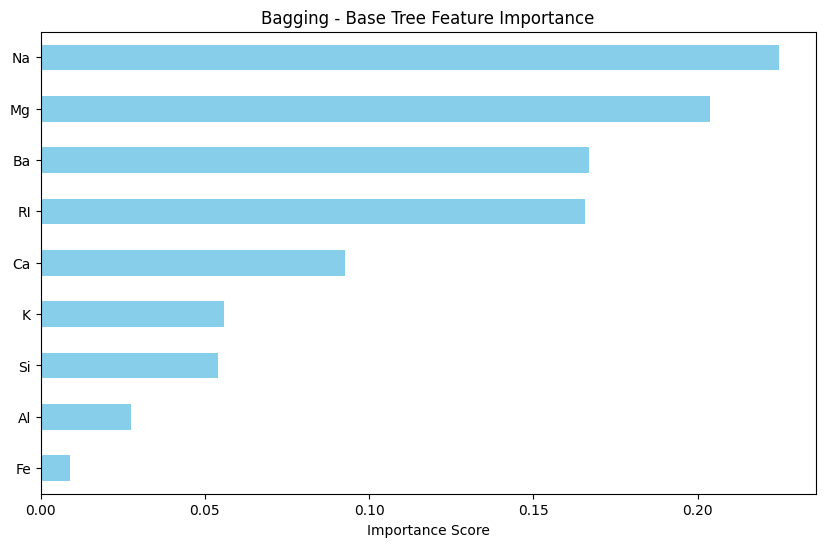

In [ ]:
plot_feature_importance(bag_model.estimators_[0],x.columns,"Bagging - Base Tree Feature Importance")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

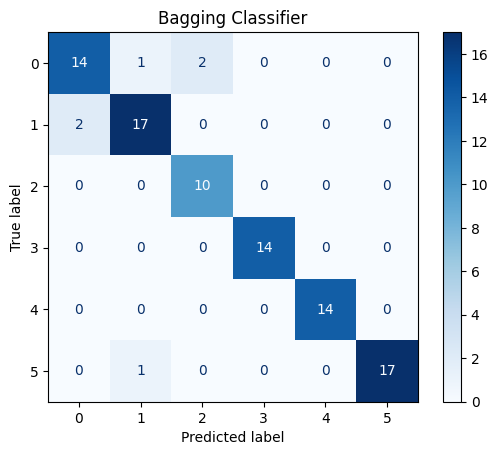

In [ ]:
plot_conf_matrix(bag_model,x_test,y_test, "Bagging Classifier")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

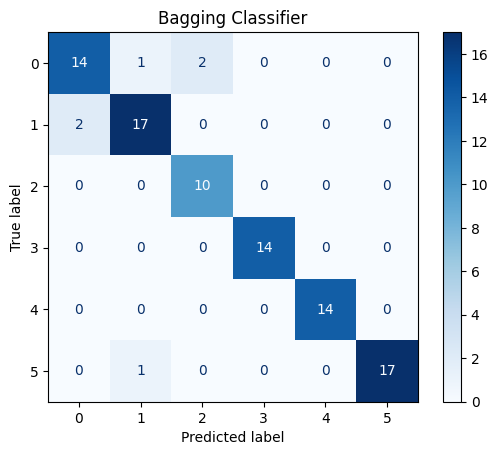

In [ ]:
plot_conf_matrix(bag_model,x_test,y_test, "Bagging Classifier")

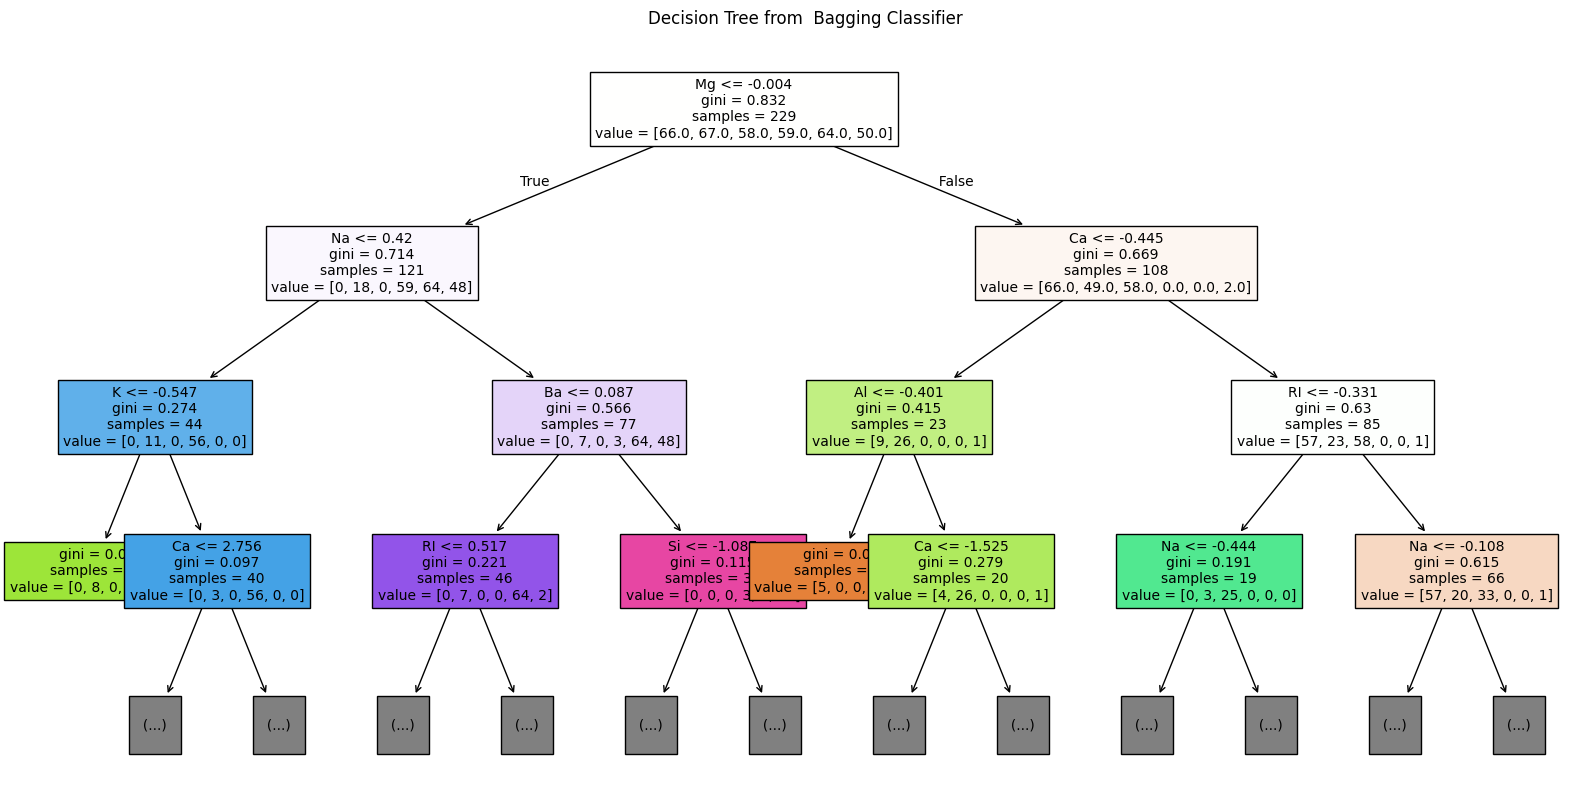

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(bag_model.estimators_[0], filled=True, feature_names=x.columns,max_depth=3,fontsize=10)
plt.title("Decision Tree from  Bagging Classifier")
plt.show()

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(x_train,y_train)
ada_model

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
evaluate_model(ada_model,x_test,y_test, "AdaBoost Classifier")

 AdaBoost Classifier
  Accuracy:  0.5326
  Precision: 0.4719
  Recall:    0.5326
  F1-Score:  0.4787



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.532608695652174, 0.4718739784243216, 0.532608695652174, 0.4787275313591103)

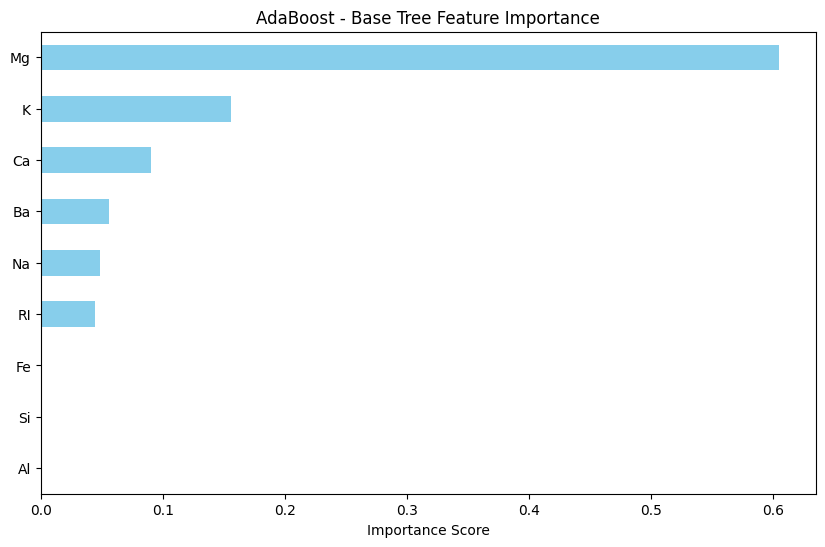

In [ ]:
plot_feature_importance(ada_model,x.columns,"AdaBoost - Base Tree Feature Importance")

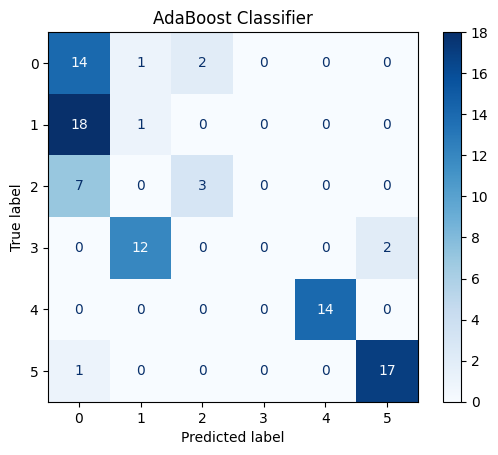

In [ ]:
plot_conf_matrix(ada_model,x_test,y_test, "AdaBoost Classifier")

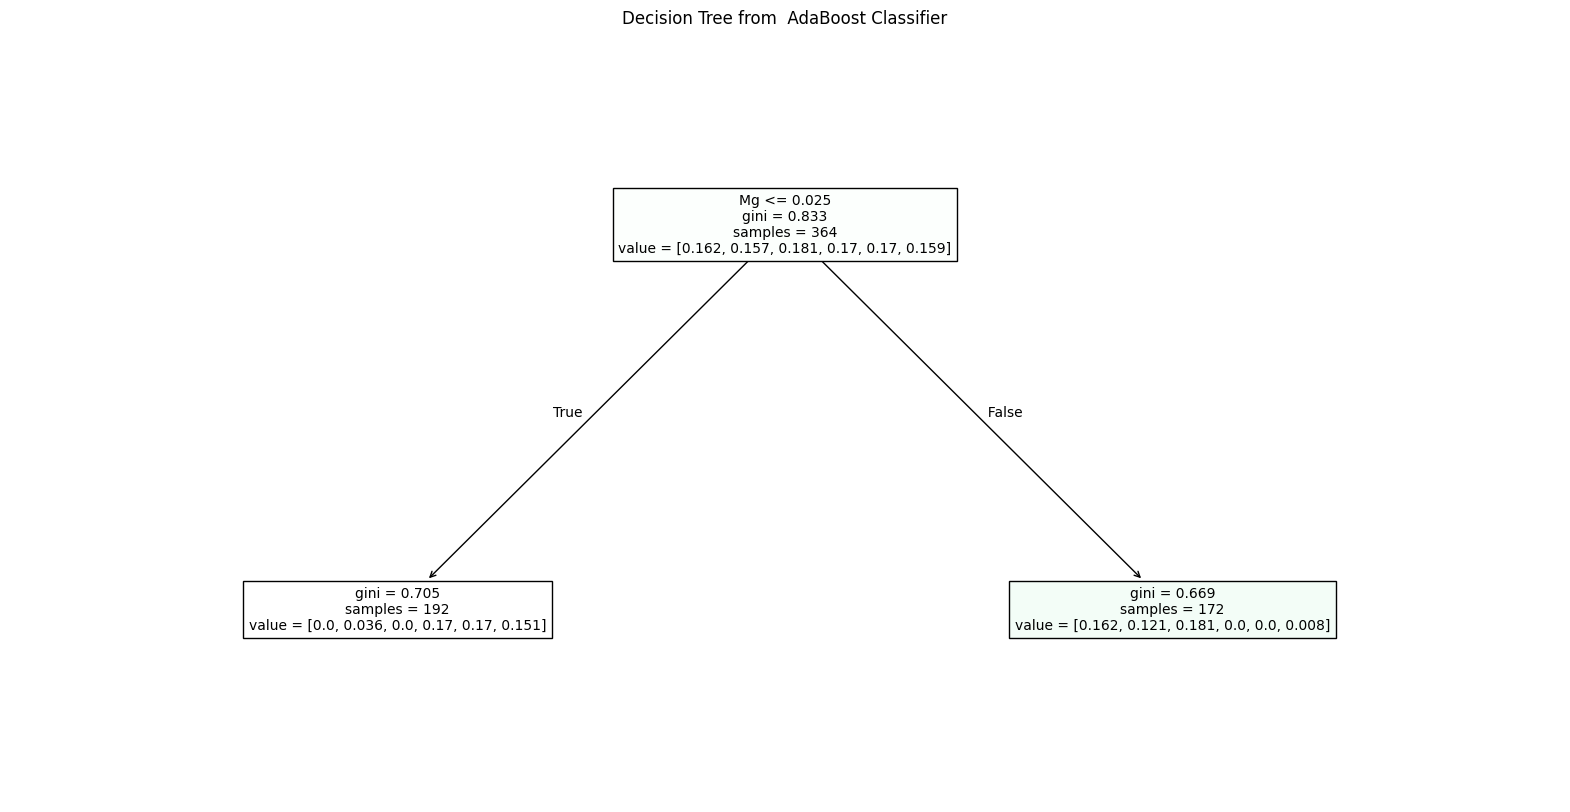

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(ada_model.estimators_[0], filled=True, feature_names=x.columns,max_depth=3,fontsize=10)
plt.title("Decision Tree from  AdaBoost Classifier")
plt.show()

In [ ]:
gb_model=GradientBoostingClassifier(n_estimators=100,random_state=42)
gb_model.fit(x_train,y_train)
gb_model

GradientBoostingClassifier(random_state=42)

In [ ]:
evaluate_model(gb_model,x_test,y_test, "Gradient Boosting Classifier")

 Gradient Boosting Classifier
  Accuracy:  0.9457
  Precision: 0.9518
  Recall:    0.9457
  F1-Score:  0.9464



(0.9456521739130435,
 0.9518185618729097,
 0.9456521739130435,
 0.9463515113326078)

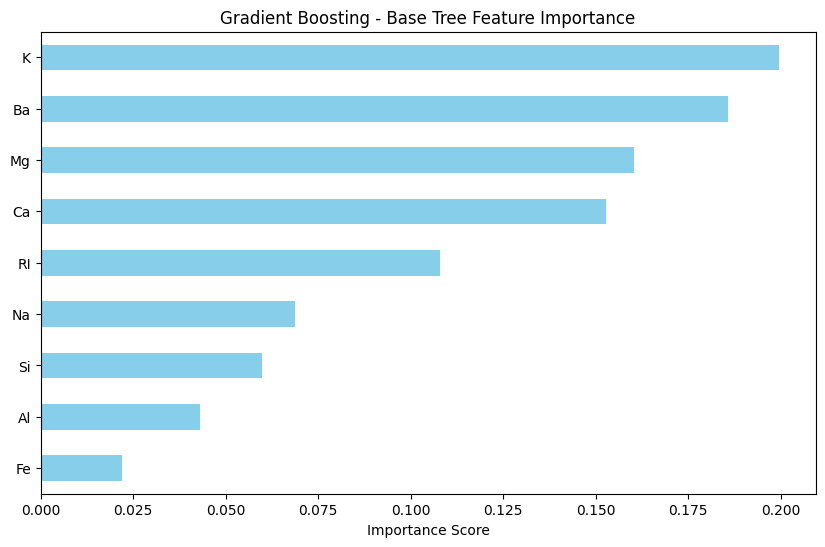

In [ ]:
plot_feature_importance(gb_model,x.columns,"Gradient Boosting - Base Tree Feature Importance")

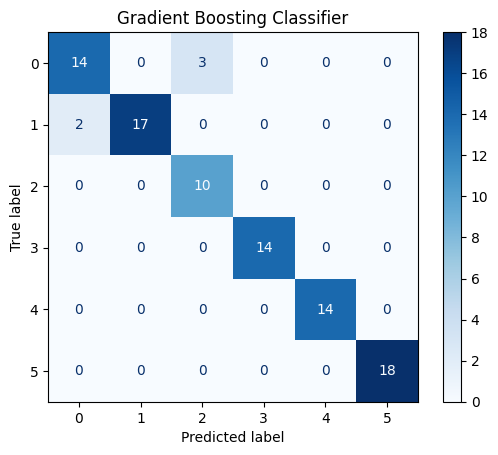

In [ ]:
plot_conf_matrix(gb_model,x_test,y_test, "Gradient Boosting Classifier")

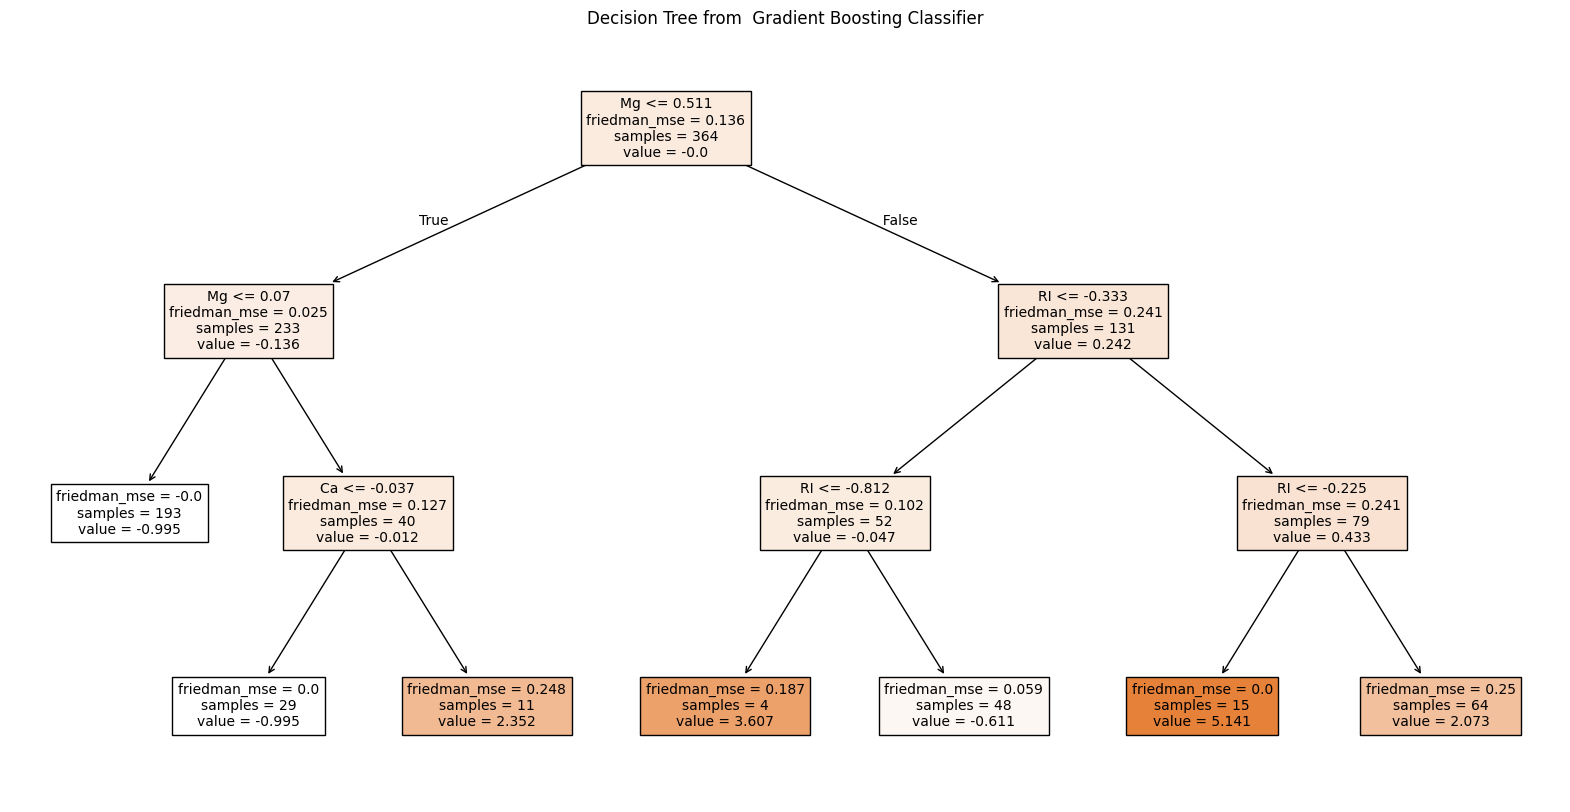

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree=gb_model.estimators_[0,0]
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=x.columns,max_depth=3,fontsize=10)
plt.title("Decision Tree from  Gradient Boosting Classifier")
plt.show()

# 1. Explain Bagging and Boosting methods. How is it different from each other.



### **Bagging (Bootstrap Aggregating)**

* Uses random subsets of data with replacement (bootstrapping).
* Trains multiple models independently and in parallel.
* Final prediction by majority voting (classification) or averaging (regression).
* Reduces **variance** and prevents overfitting.
* Example: **Random Forest**.


### **Boosting**

* Trains models sequentially, each new model learns from errors of the previous.
* Misclassified points get higher weights in the next iteration.
* Final prediction is a weighted combination of all models.
* Reduces **bias** and builds a strong learner from weak learners.
* Examples: **AdaBoost, Gradient Boosting, XGBoost, LightGBM**.


### **Key Differences**

* Bagging → Models trained **independently (parallel)**.
* Boosting → Models trained **sequentially (dependent)**.
* Bagging → Reduces **variance**.
* Boosting → Reduces **bias**.
* Bagging → Uses **bootstrapped subsets**.
* Boosting → Uses **weighted data based on errors**.


---
# 2. Explain how to handle imbalance in the data.

### **Imbalanced Data**

* Occurs when one class has many more samples than the other(s).
* Leads to biased models → good on majority class, poor on minority class.


### **Techniques to Handle Imbalance**

1. **Resampling Methods**

   * **Oversampling (e.g., SMOTE)** → Add synthetic samples to the minority class.
   * **Undersampling** → Reduce samples from the majority class (risk: information loss).

2. **Class Weights**

   * Give higher weights to minority class in the loss function.
   * Example: `class_weight='balanced'` in scikit-learn models.

3. **Evaluation Metrics**

   * Avoid using only **accuracy**.
   * Use **Precision, Recall, F1-Score, AUC-ROC, Confusion Matrix**.

4. **Ensemble Methods**

   * Use Random Forest, Gradient Boosting, XGBoost, etc.
   * Combine with resampling or class weights for better results.





